<center><span style="font-size:50px"> INFORMATION-THEORY & HYPERSCANNING TUTORIAL</span></center>

***
***

Efficiently calculate mutual information (MI), transfer entropy (TE), and causal emergence for hyperscanning data using Lizier's (2014, doi:10.3389/frobt.2014.00011) JIDT toolkit and other methods, specified where appropriate.

 
Information-theoretic measures are non-parametric by design and are thus sensitive to nonlinear dynamics. Standard connectivity measures including PLV, (w)PLI, CCorr, etc. are parametric measures.

***
<br> 
<b><span style="font-size:20px">Shannon Entropy</span></b>

This is the expected value of Shannon information content and can be understood as a general measure of "surprise" or "unpredictability" of a variable $X$. Respectively, for discrete data/estimators (e.g., binning, symbolic), Shannon entropy is given by 

$$H(X) = -\sum_{x \in \mathcal{X}}p_X(x)\log_2p_X(x)$$

and for continuous data/estimators (box kernel, kNN, Gaussian), Shannon or "differential" entropy is given by

$$H(X) = -\int_{\mathcal{X}}p_X(x)\log_2p_X(x)$$

<br> <br> <br>
<b><span style="font-size:20px">Mutual Information</span></b>

The 3H estimator is often used to calculate mutual information.
\begin{align} \notag
I(X;Y) &\equiv H(X) + H(Y) - H(X,Y) \\ \notag
&\equiv H(X) - H(X|Y) \\ \notag
&\equiv H(Y) - H(Y|X) \\ \notag
&\equiv H(X,Y) - H(X|Y) - H(Y|X) \notag
\end{align}

Mutual information can also be understood as measuring the divergence between the joint probability of two variables and the product of their marginal distributions (aka Kullback-Liebler Divergence: $D_{\text{KL}}(P_{XY} \,||\, P_{X} \otimes P_{Y})$). In this way, mutual information can be determined in the following way

$$ I(X;Y) = \sum_{x \in \mathcal{X}}\sum_{y \in \mathcal{Y}}p_{XY}(x,y)\log_2\left(\frac{p_{XY}(x,y)}{p_X(x)p_Y(y)}\right) $$
$$ I(X;Y) = \int_{\mathcal{X}}\int_{\mathcal{Y}}p_{XY}(x,y)\log_2\left(\frac{p_{XY}(x,y)}{p_X(x)p_Y(y)}\right) $$


<br> <br> <br>
<b><span style="font-size:20px">Transfer Entropy</span></b>

The transfer entropy (TE) between a source variable $Y$ on a target variable(s) $X$ can be interpreted as the predictive ability of $\bm{Y}_{t-1} := (Y_{t-1}, Y_{t-2}, \ldots, Y_{t-l})$ (i.e., the past states of $\bm{Y}$ until embedding history length $l$) on $X_t$ (i.e., the current state of $\bm{X}$), over and above $\bm{X}_{t-1}$ (i.e., $\bm{X}$'s own past states). In other words, TE quantifies how much the future state of $\bm{X}$ can be predicted by knowing the past and present states of another system $\bm{Y}$, beyond what is predictable from the past of the target system $\bm{X}$ alone. Simpler still, it addresses the question "how well/much better does $\bm{Y}$ know $\bm{X}$, more than it knows itself?" 
TE is a dynamic and directional ($\therefore$ asymmetric) measure of information transfer between two variables. However, and critically, since this measure is not conditioned on any other potentially causal variables but just a pairwise statistical measure, TE should not be (at least strictly) interpreted as quantifying causality per se. Instead, this pairwise approach should be understood as \textbf{apparent transfer entropy} (Lizier, 2014). In any case, so-called apparent TE is given by

\begin{align} \notag
    TE_{Y\rightarrow X}^{(k,l,u,\tau)} &= I(\bm{Y}_{t-u}^{(l,\tau_Y)}; X_t | \bm{X}_{t-1}^{(k,\tau_X)}) \\ \notag
    &= \sum_{\substack{x_t, \, \bm{x}_{t-1}^{(k,\tau_X)} \in \mathcal{X}, \\ \bm{y}_{t-u}^{(l,\tau_Y)} \in \mathcal{Y}}} p\left(x_t, \bm{x}_{t-1}^{(k,\tau_X)}, \bm{y}_{t-u}^{(l,\tau_Y)}\right) \log_2 \left( \frac{p\left(\bm{y}_{t-u}^{(l,\tau_Y)}, x_t | \bm{x}_{t-1}^{(k,\tau_X)}\right)}{p\left(x_t | \bm{x}_{t-1}^{(k,\tau_X)}\right)} \right)
\end{align}

with parameters including embedding history length for source ($l$) and target ($k$), embedding delay for source ($\tau_Y$) and target ($\tau_X$), and some causal delay or interaction lag $u$. Respectively, the embedded target and source states can be given as $\bm{x}_{t-1}^{(k,\tau_X)} = \{ x_{t-(k-1)\tau_X}, \ldots, x_{t-\tau_X}, x_{t-1} \}$ and embedded source state $\bm{y}_{t-1}^{(l,u,\tau_Y)} = \{ y_{t-u-(l-1)\tau_Y}, \ldots, y_{t-u-\tau_Y}, y_{t-u} \}$, here with the additional parameter of causal delay offsetting all realisations by some time step $u$. (For concision, probability spaces are omitted from the equation.)

***
***
<center><span style="font-size:40px">ESTIMATORS</span></center>

Given that information-theoretic measures are probability-based measures, they rely on probability distributions both marginal and joint. However, given that we can never truly know the underlying probability mass distributions or probability density distributions for discrete or continuous variables, respectively, we must estimate them. Various estimations have been given, the most used of which are provided and implemented below. 
***
***
<br> 
<b><span style="font-size:20px">1. Binning/Histogram Estimator</span></b>

Discretising time series into equal-width bins and measuring marginal and joint probability distributions as the frequency of occurences in each bin, s.t.

$$p(X=x_i) = \frac{n_i}{N}$$

where $x_i$ is the value of the $i$-th observation (or time point) and $N$ is the total number of observations.
<br>

***
<br>
<b><span style="font-size:20px">2. Kraskov–Stögbauer–Grassberger Estimators</span></b>

Using k-nearest neighbour structure, the two KSG estimators for mutual information and conditional mutual information, respectively, are given as:

\begin{align} \notag
  \hat{I}^{(1)}(X;Y) &= \psi(k) - \frac{1}{N} \sum_{i=1}^{N} \left[\psi(n_x(i) + 1) + \psi(n_y(i) + 1)\right] + \psi(N) \\ \notag

  \hat{I}^{(2)}(X;Y) &= \psi(k) - \frac{1}{k} - \frac{1}{N} \sum_{i=1}^{N} \left[\psi(n_x(i)) + \psi(n_y(i))\right] + \psi(N) \\ \notag

  {}^{C}\!\hat{I}^{(1)}(X;Y|Z) &= \psi(k) - \frac{1}{N} \sum_{i=1}^{N} \left[\psi(n_{xz}(i)) - \psi(n_{yz}(i)) + \psi(n_z(i))\right] + \psi(N) \\ \notag

  {}^{C}\!\hat{I}^{(2)}(X;Y|Z) &= \psi(k) - \frac{2}{k}  + \frac{1}{N} \sum_{i=1}^{N} \left[\psi(n_{z}(i)) - \psi(n_{xz}(i)) + \frac{1}{n_{xz}(i)} - \psi(n_{yz}(i)) + \frac{1}{n_{yz}(i)}\right] + \psi(N) \notag
  \end{align}

where $\psi$ is the digamma function (given below), $k$ is the number of nearest neighbours considered, $N$ is the total number of samples, $n_x(i)$ is the number of points within $\epsilon_i$ distance in the $X$-space for the $i$-th point, and $n_y(i)$ is the number of points within $\epsilon_i$ distance in the $Y$-space for the $i$-th point.

$$ \psi(x) = \frac{d}{dx}\ln(\Gamma(x)) = \frac{\Gamma'(x)}{\Gamma(x)}$$

<br>

***
<br> 
<b><span style="font-size:20px">3. Box Kernel Estimator</span></b>

Based on non-parametric kernel density estimations, the probability density function is estimated as

$$ \hat{f}_h(x) = \frac{1}{nh} \sum_{i=1}^{n} K\left(\frac{x - x_i}{h}\right)$$
$$
  K(u) = 
  \begin{cases} 
    \frac{1}{2} & \text{if } |u| \leq 1 \\
    0 & \text{otherwise}
  \end{cases}
$$

where $n$ is the the sample size, $h$ is the bandwidth parameter (controlling the smoothness of the resulting density estimate), and $K$ is the (box) kernel function. 



<br>

***
<br> 
<b><span style="font-size:20px">4. Gaussian Estimator</span></b>

Assumes Gaussianity of probability distributions, namely $X,Y \sim \mathcal{N}(\mu, \sigma^2)$, and therefore gives closed-form expressions for the following entropic measures.

$$ \hat{H}(X) = \frac{1}{2} \ln \left(2\pi e \sigma_X^2\right) $$

$$ \hat{I}(X;Y) = \frac{1}{2} \ln \left( \frac{\sigma_X^2 \sigma_Y^2}{\sigma_X^2\sigma_Y^2 - \sigma_{XY}^2}\right) $$



<br> For transfer entropy, given Gaussianity, it is equivalent to Granger causality or "Granger prediction" (Cohen, 2014). Therefore, we can express two variables as (linear) vector autoregressive models in the following way

$$ Y_t = \sum_{i=1}^{p} a_i Y_{t-i} + \sum_{i=1}^{p} b_i X_{t-i} + \epsilon_t $$
<br>

***
<br>
<b><span style="font-size:20px">5. Symbolic Estimator</span></b>

NOTE: JIDT does not offer a Symbolic MI calculator, only TE. We have adapted code for symbolic MI from Tyson Pond.

***
***

In [1]:
# CORE
import io
from collections import OrderedDict
import requests

# DATA SCIENCE
import numpy as np
from scipy.stats import mode 

# HYPYP
from hypyp import prep 

# VISUALISATION
import matplotlib.pyplot as plt

# MNE
import mne

## INFO-THEORY MEASURES
from it import *

setup_JVM(os.getcwd())

Reading File-like ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
260 matching events found
No baseline correction applied
0 projection items activated
Reading File-like ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
36 matching events found
No baseline correction applied
0 projection items activated
Dropped 224 epochs: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 104, 105, 106, 107, 108, 109, 110, 111, 113, 114, 116, 117, 118, 119, 120, 121, 122, 125, 126, 127, 128, 130, 131, 13

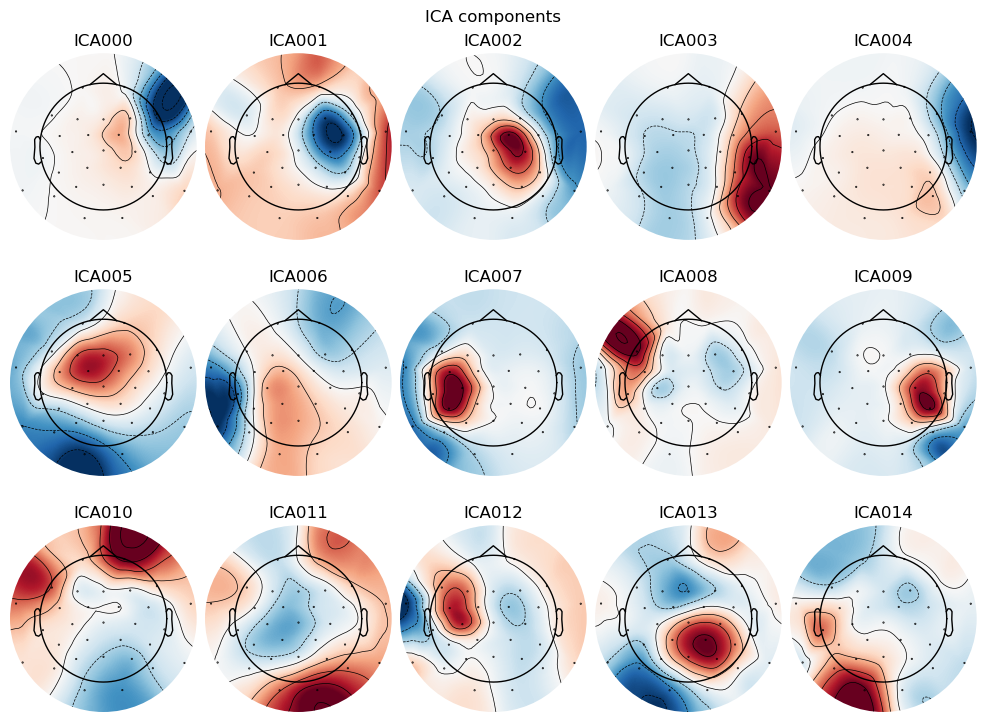

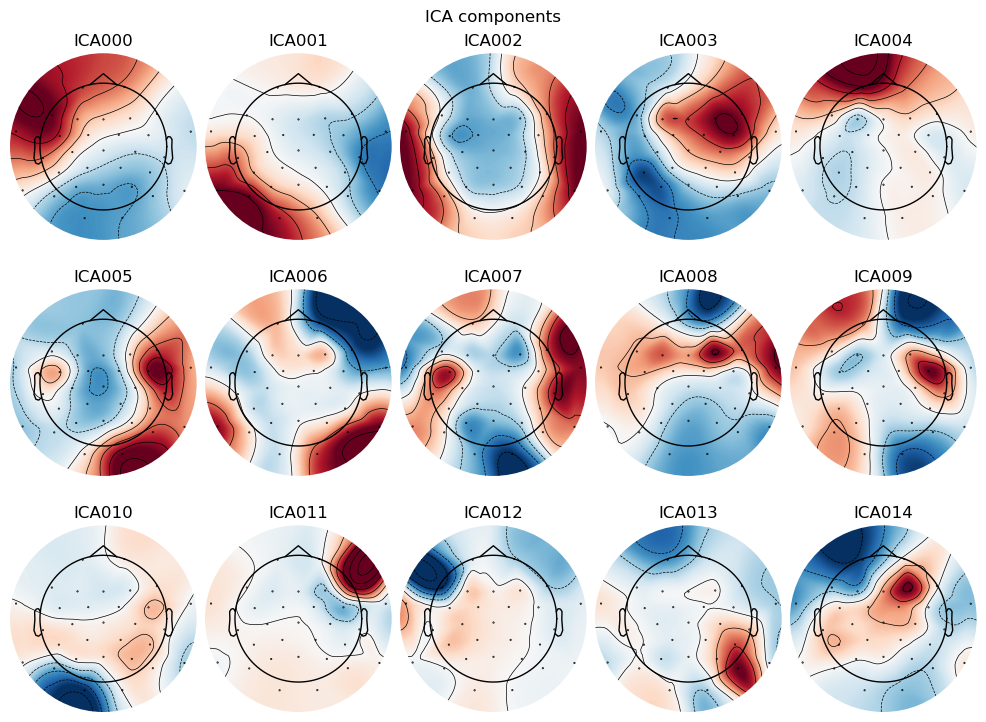

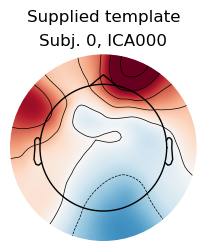

Median correlation with constructed map: 1.000
Displaying selected ICs per subject.
No maps selected for subject [1], consider a more liberal threshold.


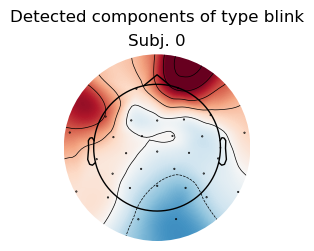

[{'blink': [10]}, {'blink': []}]
Applying ICA to Epochs instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 31 PCA components
Applying ICA to Epochs instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 31 PCA components
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/36 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/36 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/36 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/36 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=4
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/36 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/36 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/36 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/36 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=1
Dropped 10 epochs: 0, 1, 3, 4, 5, 6, 8, 9, 13, 20


  0%|          | Repairing epochs : 0/26 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.
Dropped 10 epochs: 0, 1, 3, 4, 5, 6, 8, 9, 13, 20


  0%|          | Repairing epochs : 0/26 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.
27.77777777777778 percent of bad epochs
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


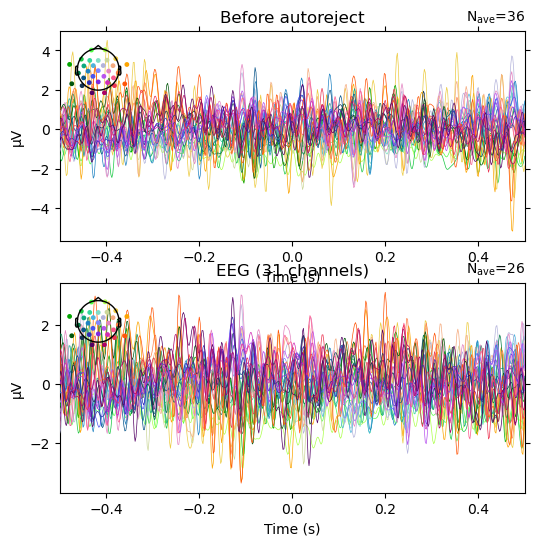

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


<Figure size 640x480 with 0 Axes>

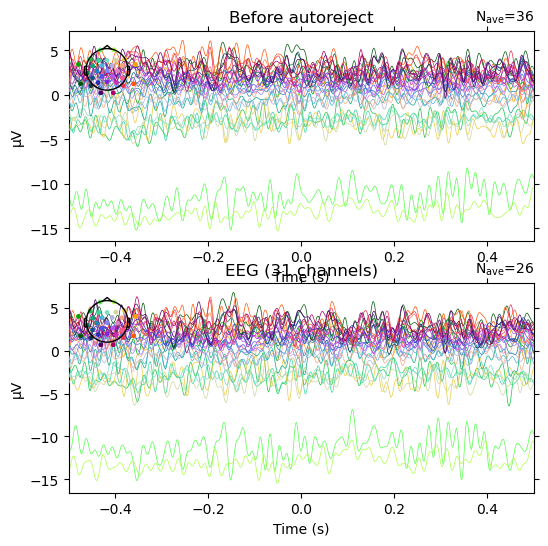

<Figure size 640x480 with 0 Axes>

In [2]:
full_freq = { 'full_frq': [1, 48]}
freq_bands = OrderedDict(full_freq)

URL_TEMPLATE = "https://github.com/ppsp-team/HyPyP/blob/master/data/participant{}-epo.fif?raw=true"

def get_data(idx):
    return io.BytesIO(requests.get(URL_TEMPLATE.format(idx)).content)

epo1 = mne.read_epochs(get_data(1), preload=True) 
epo2 = mne.read_epochs(get_data(2), preload=True)
mne.epochs.equalize_epoch_counts([epo1, epo2])

sampling_rate = epo1.info['sfreq']

icas = prep.ICA_fit([epo1, epo2], n_components=15, method='infomax', fit_params=dict(extended=True), random_state = 42)
cleaned_epochs_ICA = prep.ICA_choice_comp(icas, [epo1, epo2])
cleaned_epochs_AR, _ = prep.AR_local(cleaned_epochs_ICA, strategy="union", threshold=50.0, verbose=True)

preproc_S1, preproc_S2 = cleaned_epochs_AR
data_inter = np.array([preproc_S1, preproc_S2])


# Using HyperIT

The HyperIT Class is a framework that calculates Mutual Information (MI) and Transfer Entropy (TE), specifically handling continuous time-series data (typically EEG, MEG, fNIRS) which may be epoched or unepoched. Most estimators — KSG, Box Kernel, Symbolic (TE only), and Gaussian — are equipped with statistical significance testing (SST) based on permutation/bootstrapping approaches.

<br>

First, the HyperIT Class must be instantiated, passing both participants' time-series data as np.ndarrays with either shape (epochs, channels, samples) or (channels, samples) as well as the channel names. Both time-series data must be of the same shape and length, and the number of channels should correspond to the length of channel_name lists. For intra-brain analysis, pass the same time-series data twice (i.e., data2 = data1) and either a single list or double (duplicated) list of channel names as follows ```[[ch1],[ch2]]``` or ```[[ch1]]```.

Next, call the MI and TE functions, specifying the estimator type, whether to conduct statistical significance testing (SST), output visualisations, and (optionally) key arguments for the estimator type (outlined exhaustively below). The MI function will return only one matrix (since MI is a symmetric measure) and TE will return two matrices ($TE_{1\rightarrow 2}$, $TE_{2\rightarrow 1}$).

When SST is selected, matrices will return with shape (channels, channels, epochs, 4) where the last dimension is (MI/TE result, SST distribution mean, SST distribution std, SST p-value), and when SST is not selected, matrices will return with shape (channels, channels, epochs, 1) where the last dimension is (MI/TE result). Note, when the data is not epoched, the third dimension will have shape 1. 

<br>

PARAMETER OPTIONS FOR ESTIMATORS (defaults in parentheses):

- MI
    - **Histogram**: (No SST available yet)
    - **KSG 1**: kraskov_param (4), normalise (True)
    - **KSG 2**: kraskov_param (4), normalise (True)
    - **Kernel**: kernel_width (0.25), normalise (True)
    - **Gaussian**: None
    - **Symbolic**: (No SST available yet)

- TE
    - **KSG**: k, k_tau, l, l_tau, delay, kraskov_param (all 1), normalise (True)
    - **Kernel**: k (1), kernel_width (0.5), normalise (True)
    - **Gaussian**: k, k_tau, l, l_tau, delay (all 1), bias_correction (False)
    - **Symbolic**: k (1)

100%|██████████| 31/31 [02:22<00:00,  4.59s/it]


Plotting for average MI/TE across epochs. Note that p-values will not be shown.
Strongest regions: (Source Channel Cz -->  Target Channel CP1) = 0.3554191253049864


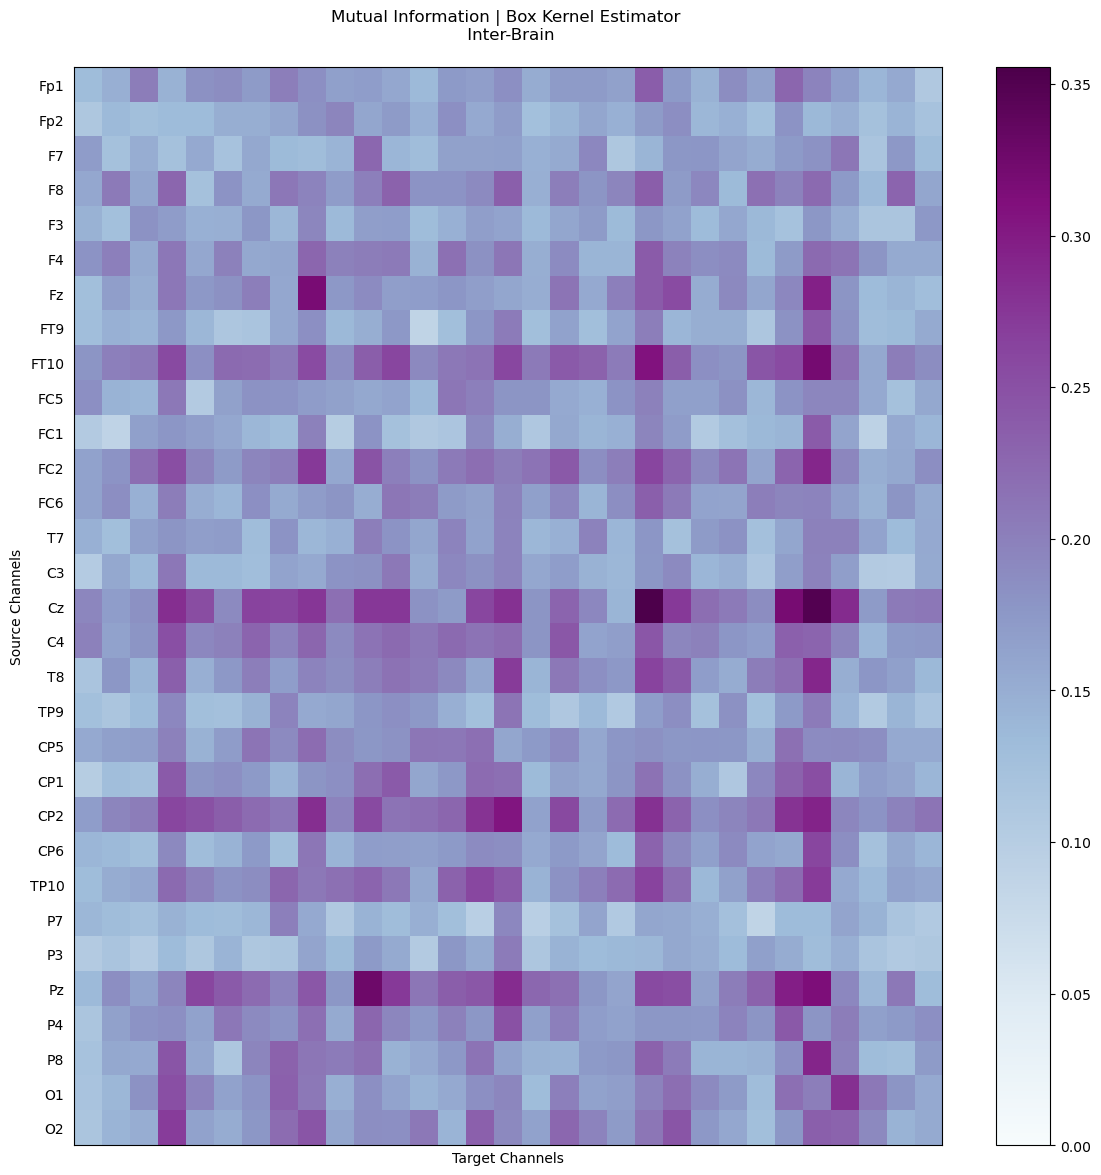

100%|██████████| 31/31 [04:09<00:00,  8.04s/it]


Plotting Transfer Entropy for X -> Y...
Plotting for average MI/TE across epochs. Note that p-values will not be shown.
Strongest regions: (Source Channel CP6 -->  Target Channel CP6) = 0.07089893975660001


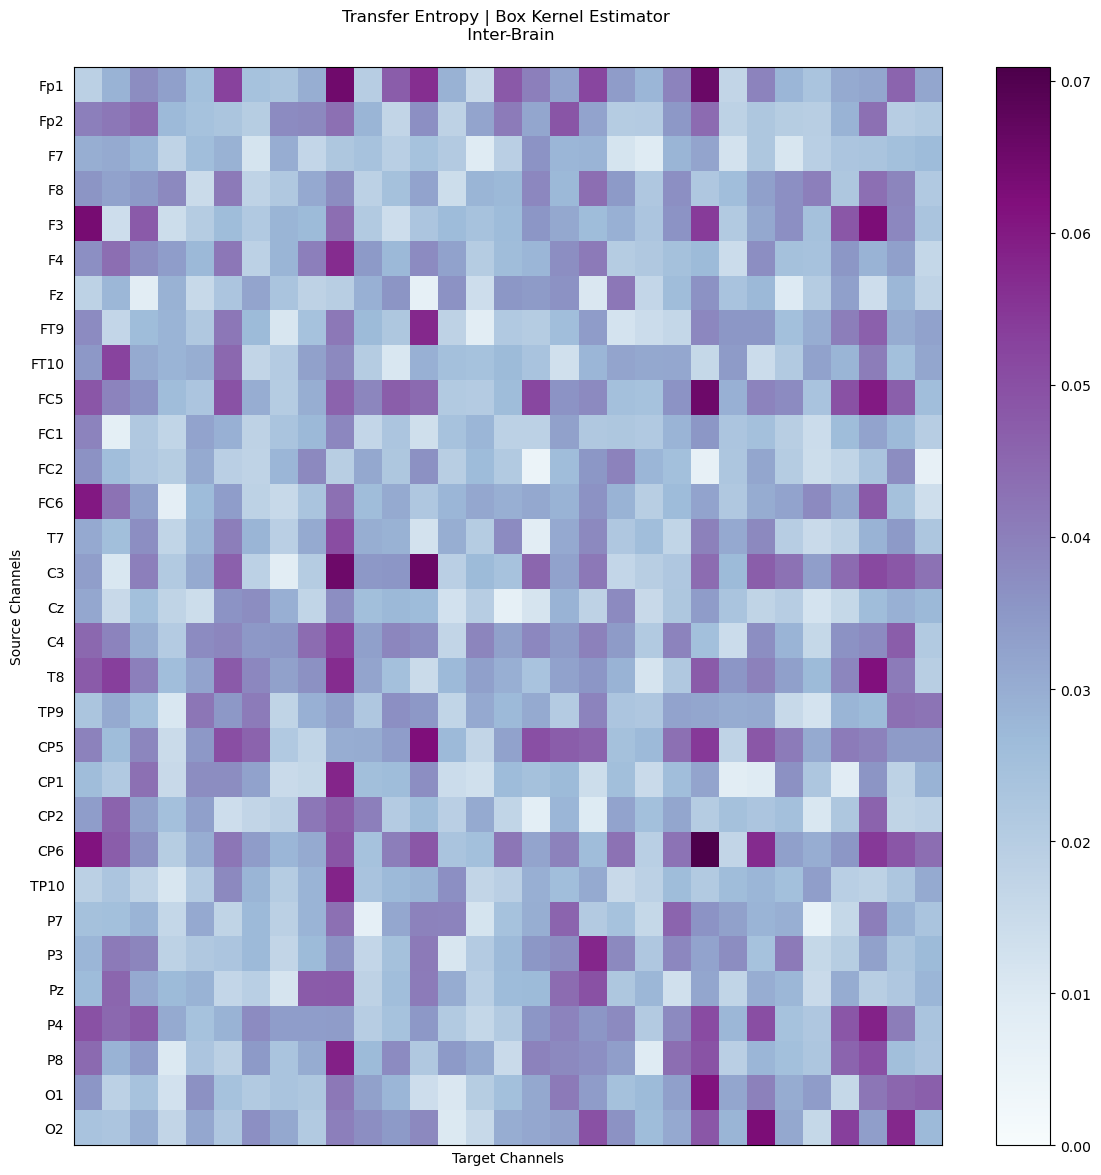

Plotting Transfer Entropy for Y -> X...
Plotting for average MI/TE across epochs. Note that p-values will not be shown.
Strongest regions: (Source Channel FT10 -->  Target Channel Fp2) = 0.0715341078183951


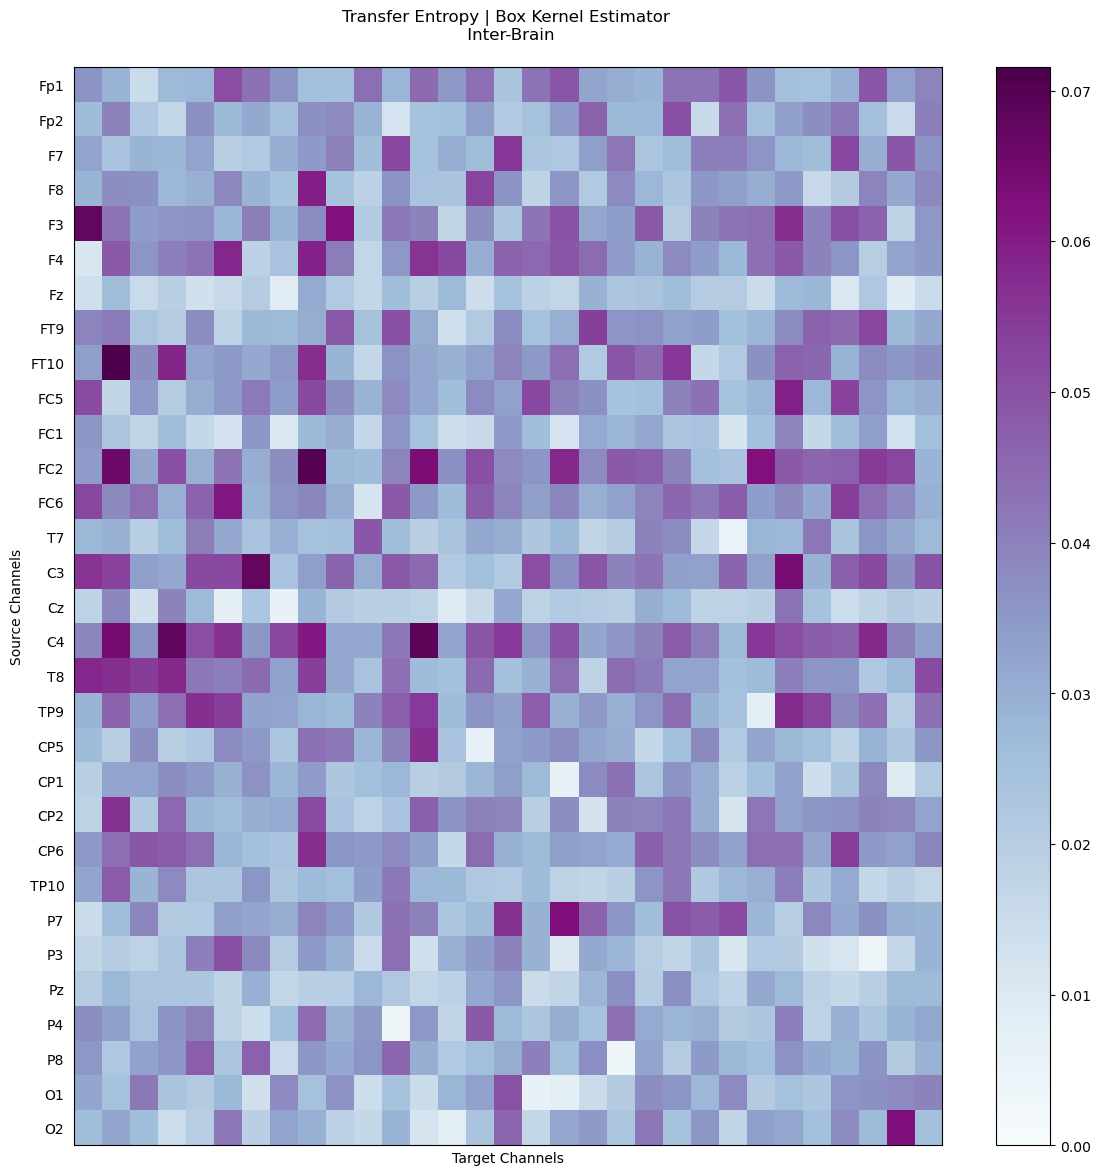

In [3]:
data1, data2 = data_inter

channel_names = [[epo1.info['ch_names']], [epo2.info['ch_names']]]

it = HyperIT(data1, data2, channel_names)
mi_matrix = it.compute_mi(estimator_type = 'kernel', calc_sigstats = False, vis = True)
te_matrix = it.compute_te(estimator_type = 'kernel', calc_sigstats = False, vis = True)

# ACCURACY TESTING

Feeding various fractions of hyperscanning data (10% to 100%) of X seconds, elbow graphs can be calculated to estimate at what fraction of data (and $\therefore$ what recomended number of time samples) is necessary for better estimations.  

100%|██████████| 31/31 [00:02<00:00, 14.79it/s]


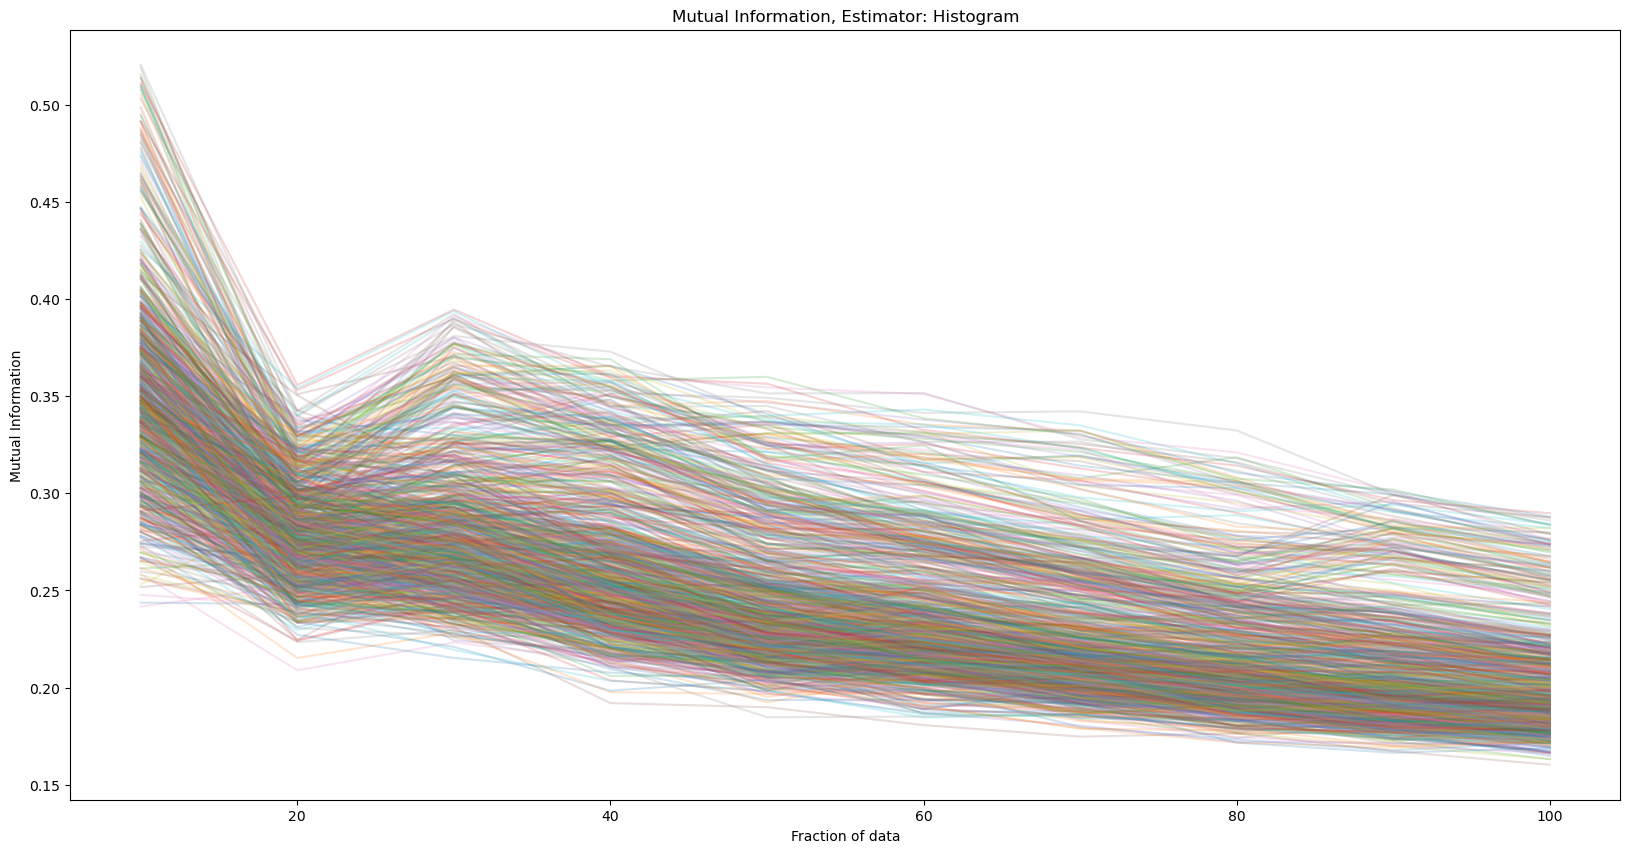

100%|██████████| 31/31 [01:07<00:00,  2.18s/it]


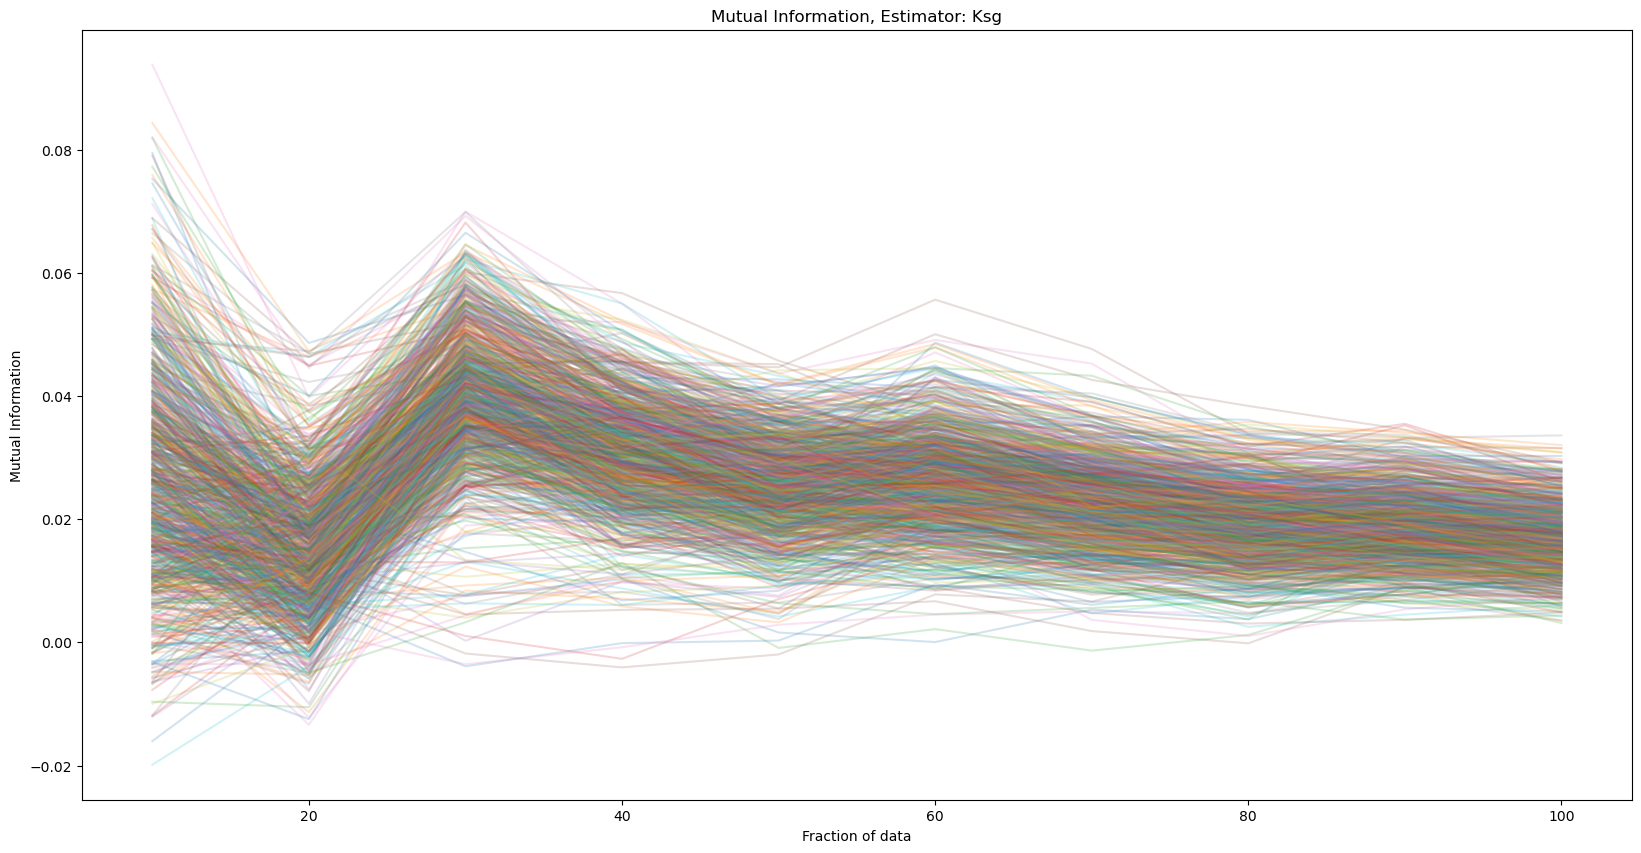

100%|██████████| 31/31 [37:46<00:00, 73.11s/it]


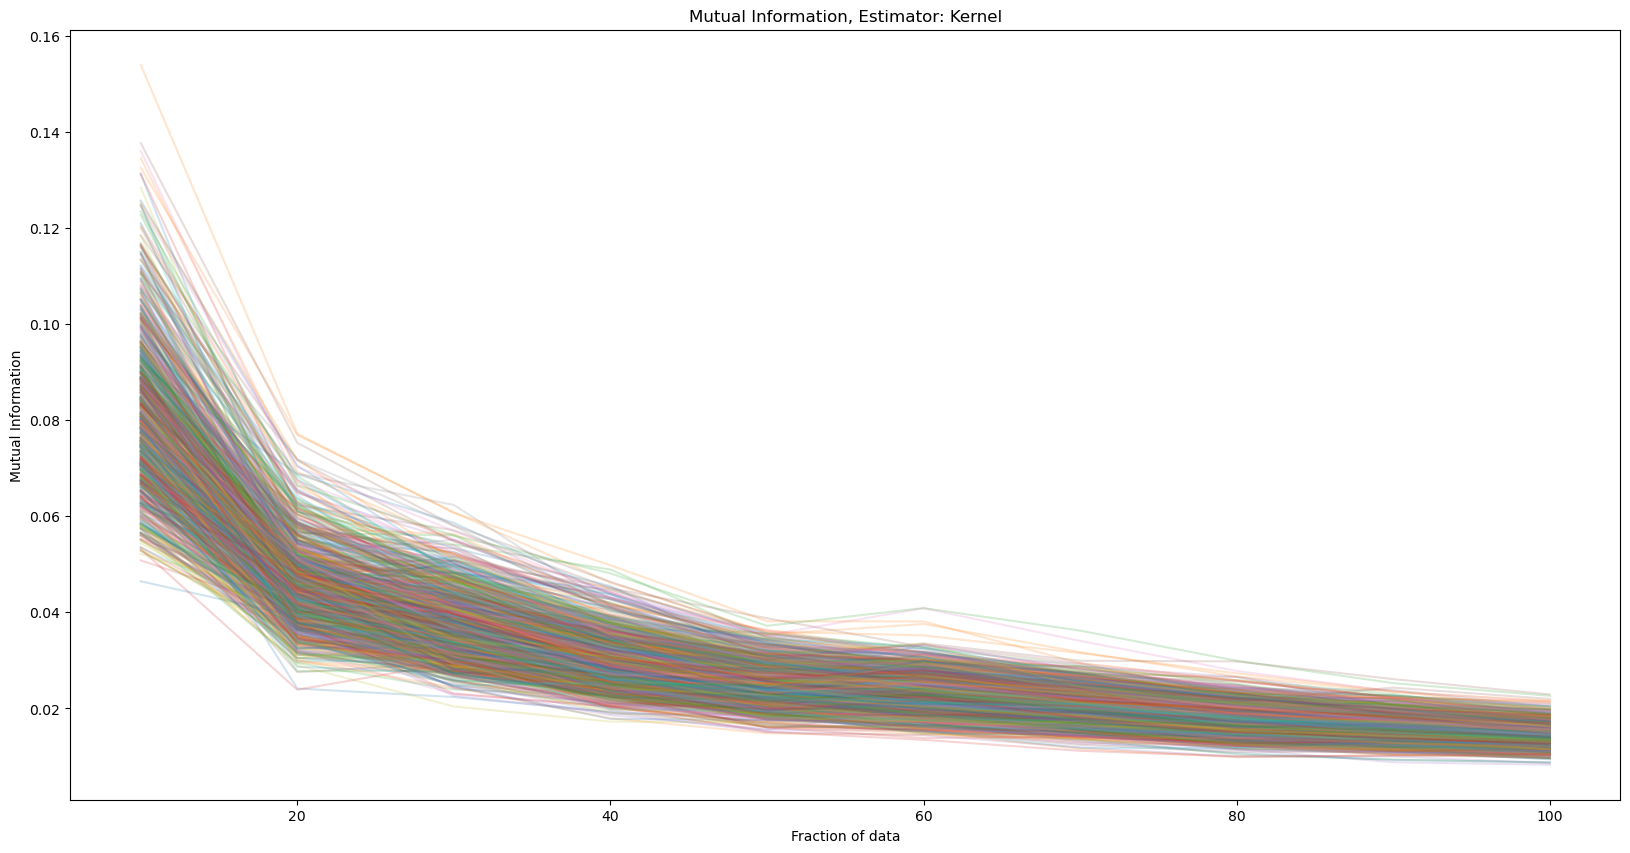

100%|██████████| 31/31 [00:14<00:00,  2.19it/s]


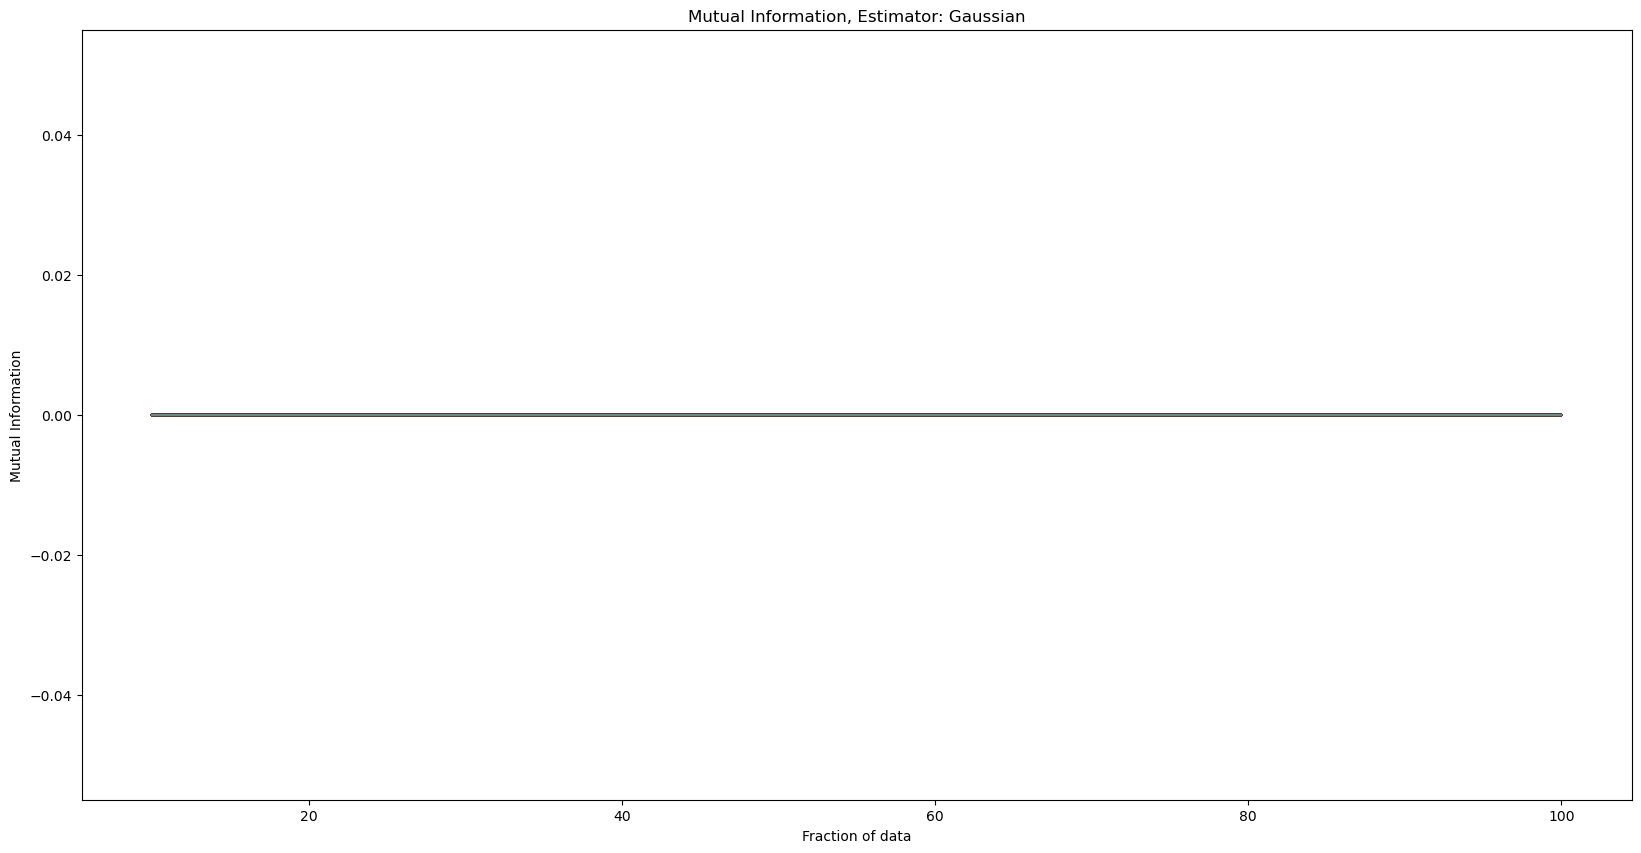

100%|██████████| 31/31 [00:19<00:00,  1.59it/s]


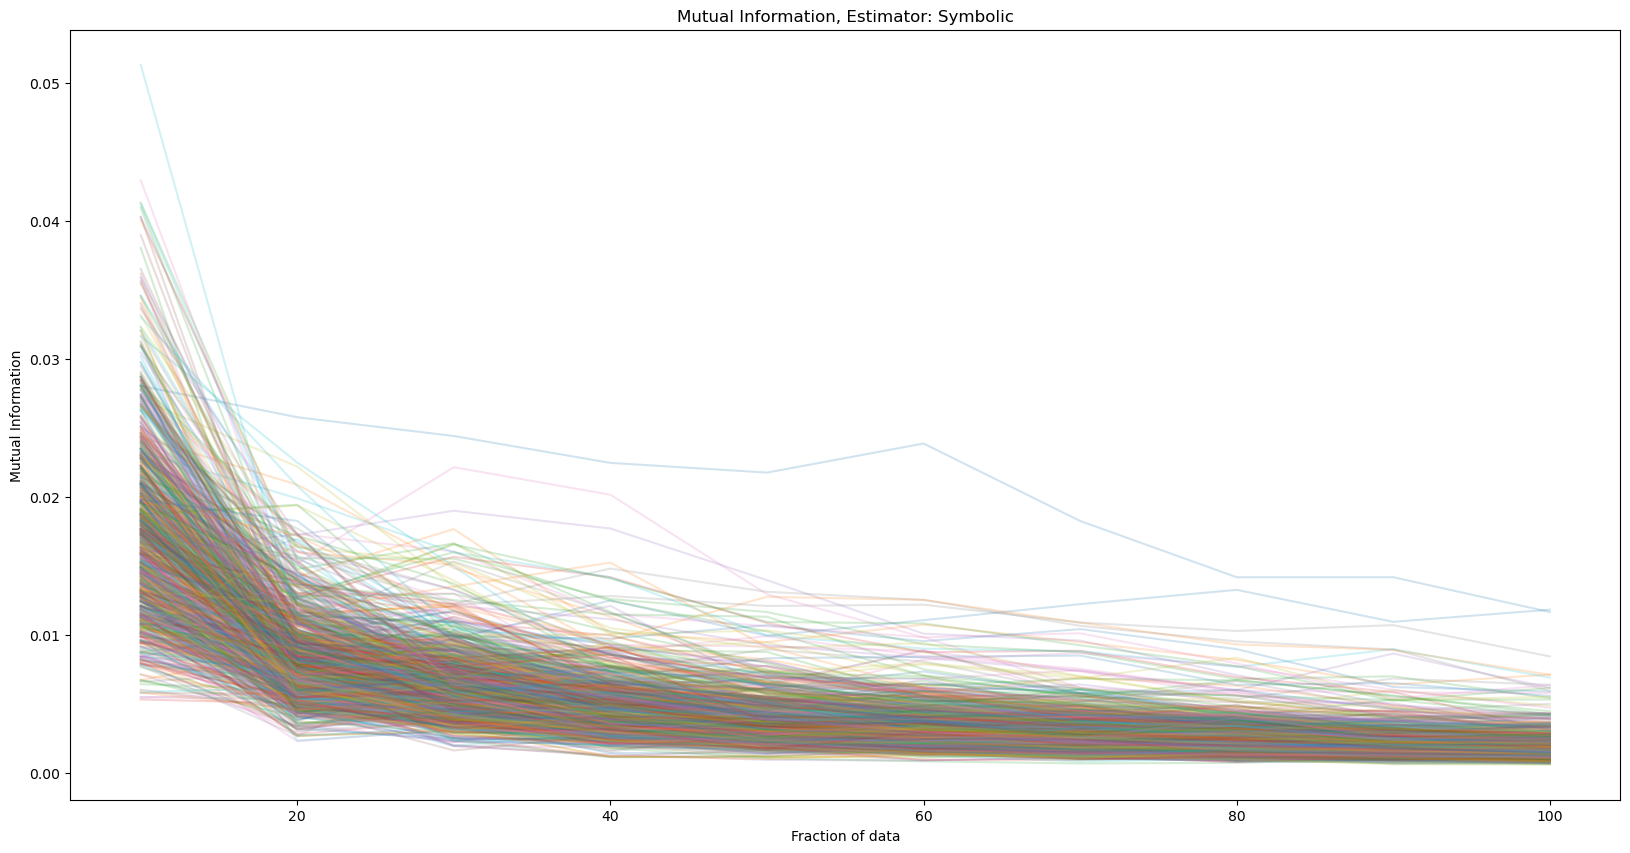

100%|██████████| 5/5 [3:00:14<00:00, 2162.98s/it]


In [3]:
X = data_inter[0].transpose(1, 0, 2).reshape(data_inter[0].shape[1], -1)
Y = data_inter[1].transpose(1, 0, 2).reshape(data_inter[1].shape[1], -1)
channel_names = [[epo1.info['ch_names']], [epo2.info['ch_names']]]


fractions = np.arange(10, 110, 10)

for estimator in tqdm(['histogram', 'ksg', 'kernel', 'gaussian', 'symbolic']):
    
    channel_pair_mi = {}

    for fraction in fractions:

        fraction_index = int(fraction * X.shape[1] / 100)
        mi_matrix = HyperIT(X[:, :fraction_index], Y[:, :fraction_index], channel_names).compute_mi(estimator_type=estimator, calc_sigstats=False, vis=False)
        
        for i in range(mi_matrix.shape[0]):
            for j in range(mi_matrix.shape[1]):
                channel_pair_mi.setdefault((i,j)), []).append(mi_matrix[i, j, 0, 0])
    

    plt.figure(figsize=(20, 10))
    for (i, j), mis in channel_pair_mi.items():
        plt.plot(fractions, mis, alpha=0.2)
    plt.xlabel("Fraction of data")
    plt.ylabel("Mutual Information")
    plt.ylim(0, np.max(list(channel_pair_mi.values())) * 1.1)
    plt.title(f"Mutual Information, Estimator: {estimator.capitalize()}")
    plt.show()

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 31/31 [00:12<00:00,  2.43it/s]
/var/folders/q1/s27_hrm11yv3xdqb638tv7yc0000gn/T/ipykernel_6758/1814700160.py:27: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(0, np.max(list(channel_pair_mi.values())) * 1.1)


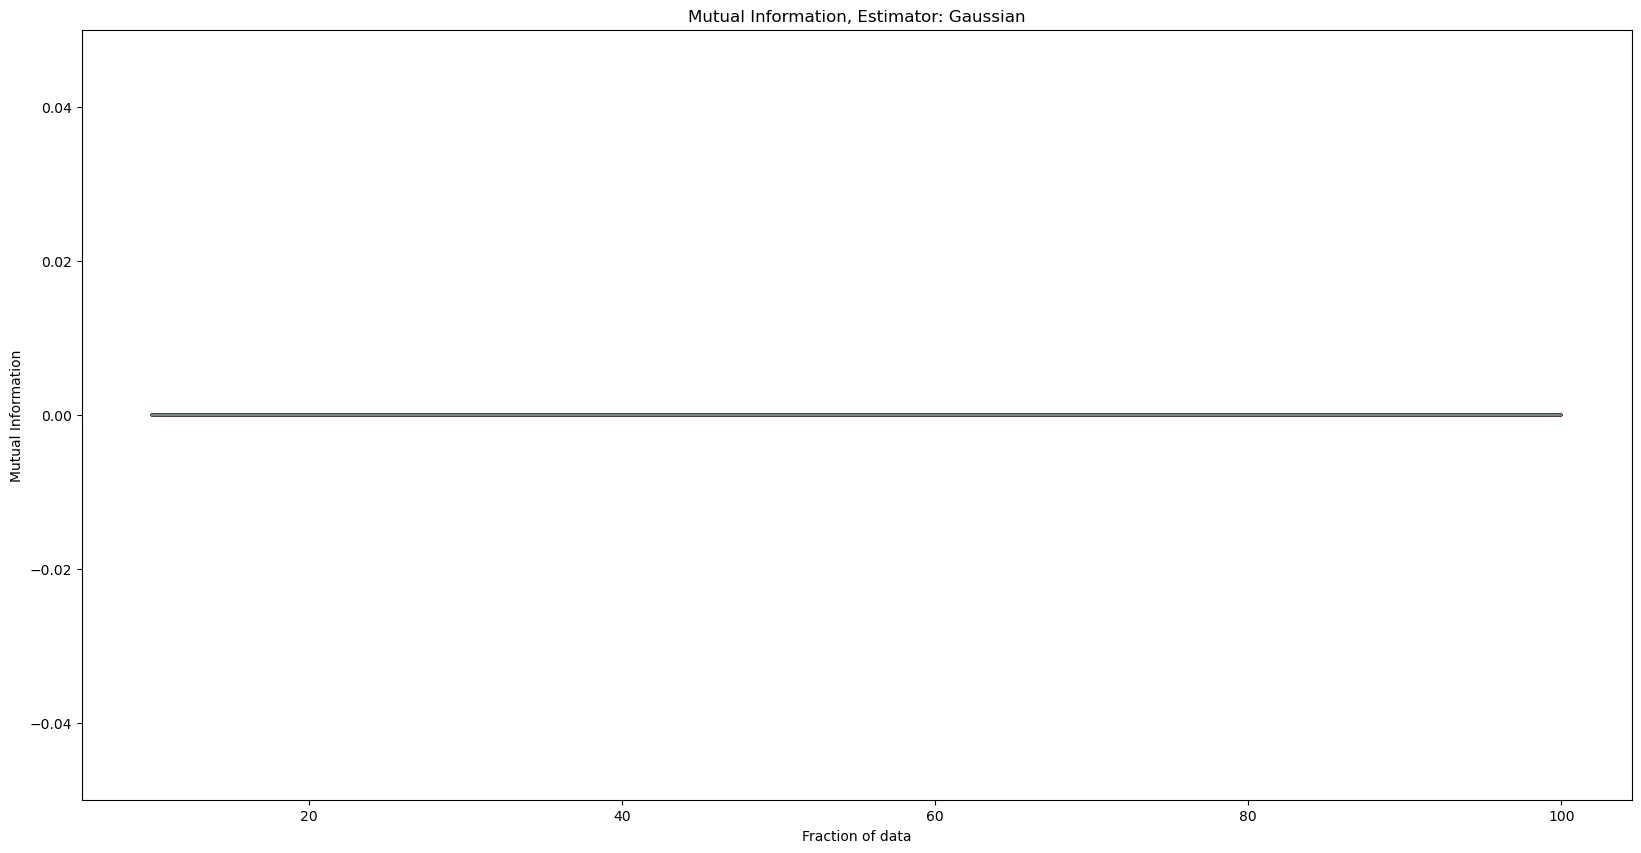

100%|██████████| 1/1 [01:11<00:00, 71.78s/it]


In [7]:
X = data_inter[0].transpose(1, 0, 2).reshape(data_inter[0].shape[1], -1)
Y = data_inter[1].transpose(1, 0, 2).reshape(data_inter[1].shape[1], -1)
channel_names = [[epo1.info['ch_names']], [epo2.info['ch_names']]]


fractions = np.arange(10, 110, 10)

for estimator in tqdm(['gaussian']):
    
    channel_pair_mi = {}

    for fraction in fractions:

        fraction_index = int(fraction * X.shape[1] / 100)
        mi_matrix = HyperIT(X[:, :fraction_index], Y[:, :fraction_index], channel_names).compute_mi(estimator_type=estimator, calc_sigstats=False, vis=False)
        
        for i in range(mi_matrix.shape[0]):
            for j in range(mi_matrix.shape[1]):
                channel_pair_mi.setdefault((i,j), []).append(mi_matrix[i, j, 0, 0])
    

    plt.figure(figsize=(20, 10))
    for (i, j), mis in channel_pair_mi.items():
        plt.plot(fractions, mis, alpha=0.2)
    plt.xlabel("Fraction of data")
    plt.ylabel("Mutual Information")
    plt.ylim(0, np.max(list(channel_pair_mi.values())) * 1.1)
    plt.title(f"Mutual Information, Estimator: {estimator.capitalize()}")
    plt.show()

100%|██████████| 31/31 [00:14<00:00,  2.10it/s]


Plotting for average MI/TE across epochs. Note that p-values will not be shown.


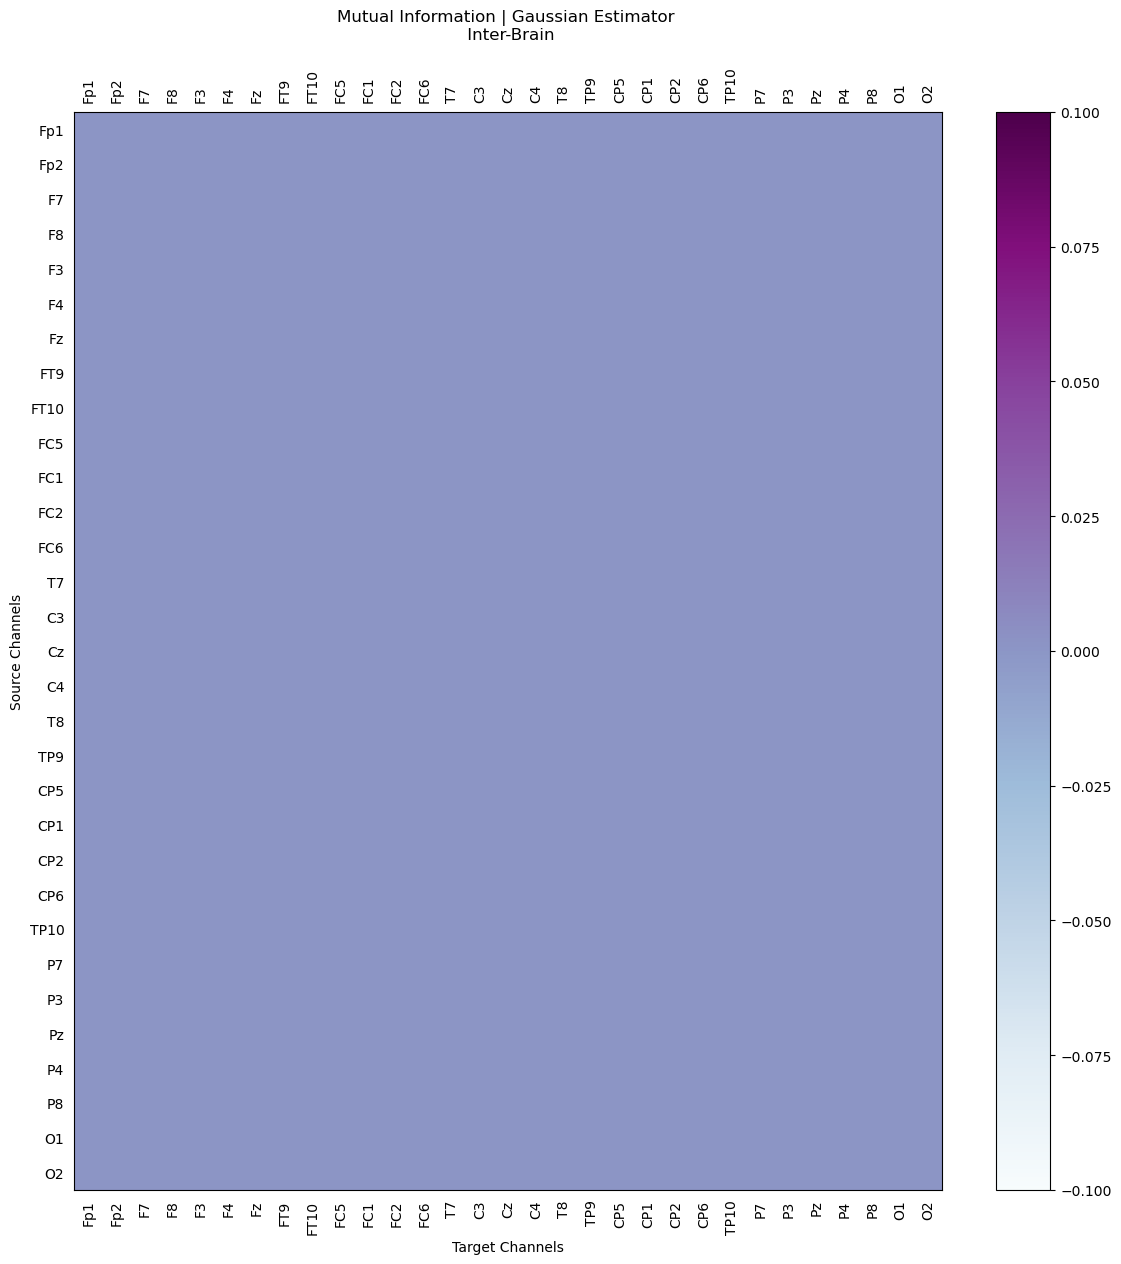

100%|██████████| 31/31 [00:52<00:00,  1.69s/it]


Plotting Transfer Entropy for X -> Y...
Plotting for average MI/TE across epochs. Note that p-values will not be shown.


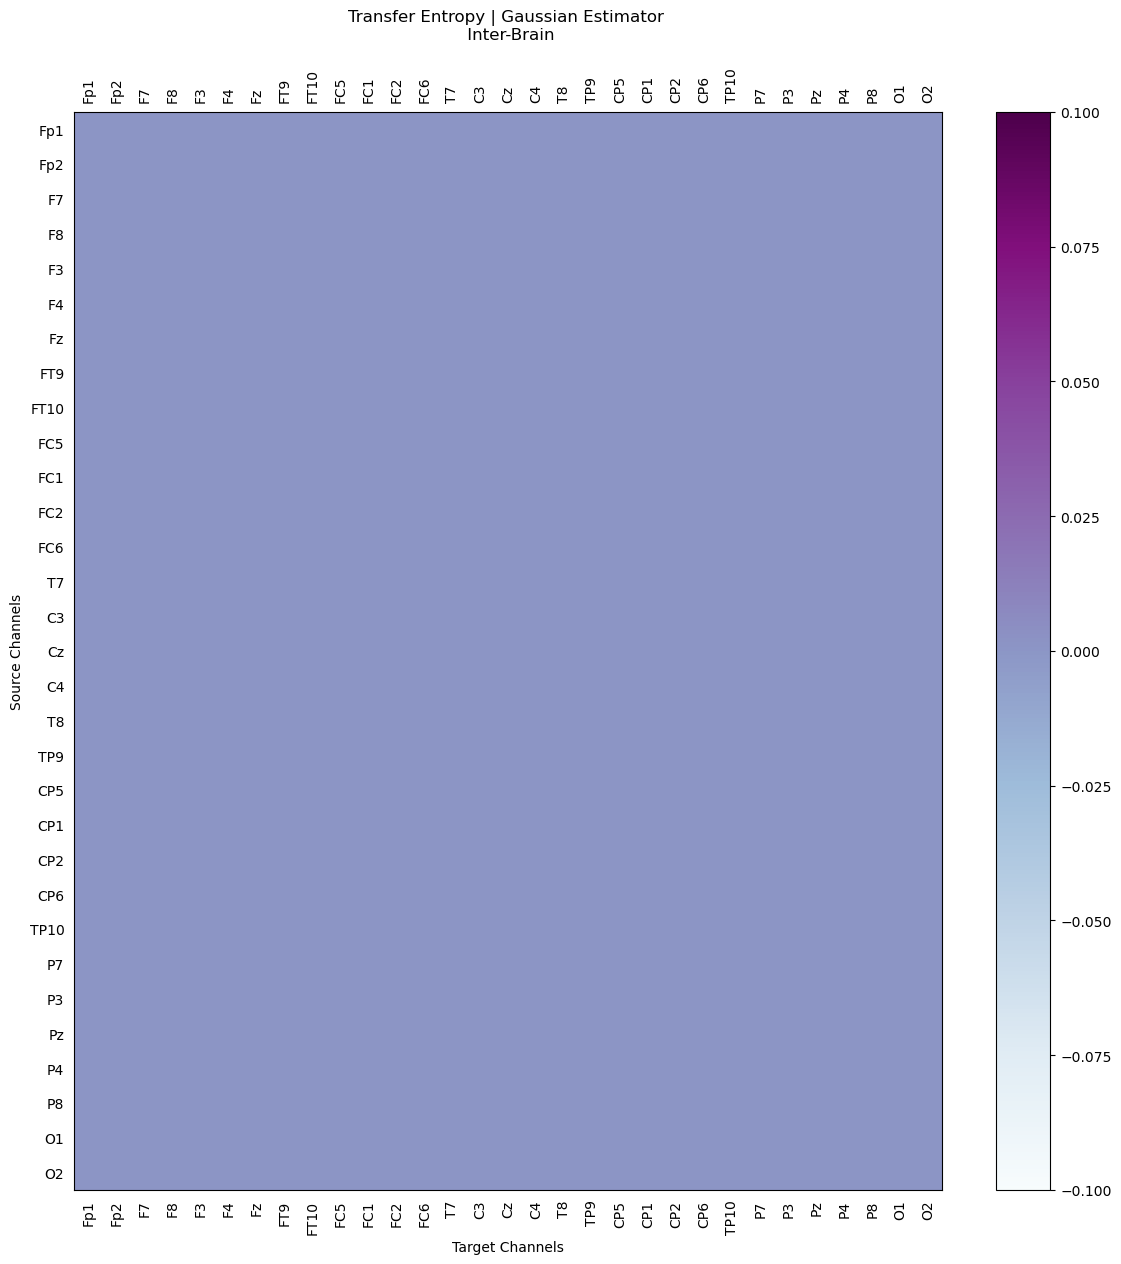

Plotting Transfer Entropy for Y -> X...
Plotting for average MI/TE across epochs. Note that p-values will not be shown.


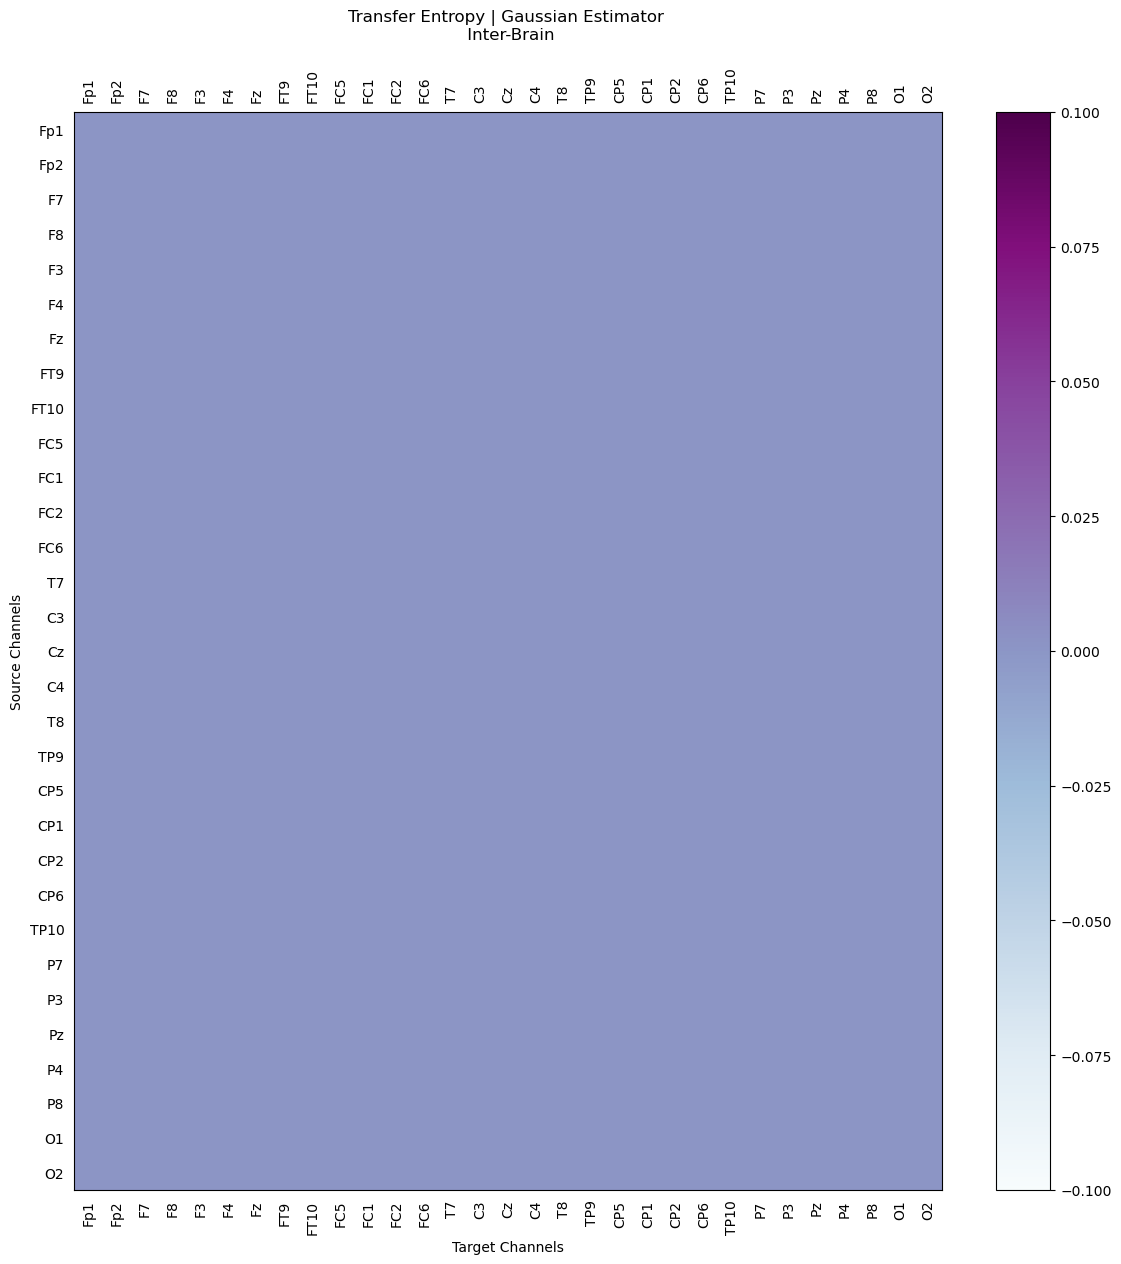

In [14]:
data1, data2 = data_inter

channel_names = [[epo1.info['ch_names']], [epo2.info['ch_names']]]

it = HyperIT(data1, data2, channel_names)
mi_matrix = it.compute_mi(estimator_type = 'gaussian', calc_sigstats = False, vis = True)
te_matrix = it.compute_te(estimator_type = 'gaussian', calc_sigstats = False, vis = True)

# SHUTDOWN JVM

In [11]:
exit_JVM()